# 12 A

HandsOn - Predict The Data Scientists Salary In India from kaggle use sklearn
dataset: Predict-The-Data-Scientists-Salary-In-India_Train_Dataset.csv

Data Features set:

1.Name of the company (Encoded)
2.Years of experience(split to min and max experience),
3.Job description,
4.Job designation,
5.Job Type,
6.Key skills,
7.Location (needs LabelEncoded),
8.Salary in Rupees Lakhs(To be predicted)(needs LabelEncoded).
Find the best estimator among below :

clf1 = DecisionTreeClassifier(),
clf2 = RandomForestClassifier(n_estimators=100),
clf3 = ExtraTreesClassifier(n_estimators=100),
clf4 =  AdaBoostClassifier(n_estimators=100),
clf5 =  GradientBoostingClassifier(n_estimators=100).

In [2]:
from sklearn.pipeline import * 
from sklearn.naive_bayes import * 
from sklearn.cluster import *  
from sklearn.covariance import *  
from sklearn.cross_decomposition import *  
from sklearn.datasets import *  
from sklearn.decomposition import *  
from sklearn.ensemble import *  
from sklearn.feature_extraction import *  
from sklearn.feature_extraction.text import *  
from sklearn.feature_selection import *  
from sklearn.gaussian_process import *  
from sklearn.linear_model import *  
from sklearn.manifold import *  
from sklearn.metrics import *  
from sklearn.mixture import *  
from sklearn.model_selection import *  
from sklearn.neighbors import *  
from sklearn.neural_network import *  
from sklearn.preprocessing import *  
# from sklearn_pandas import DataFrameMapper
from sklearn.svm import *  
from sklearn.tree import *
from yellowbrick.classifier import ConfusionMatrix, ROCAUC

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = r"code\data\Predict-The-Data-Scientists-Salary-In-India_Train_Dataset.csv"
data = pd.read_csv(path)
data.head(10)

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458
2,2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195
3,3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313
4,4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305
5,5,5-10 yrs,4.\tWillingness to travel;5.\tExperience in Te...,Senior Trainer- Academics,NaN,"academics, effective communication, teacher tr...",Noida,6to10,4428
6,6,13-15 yrs,- Experience in managing fraud analytics with ...,Associate Vice President - Fraud Analytics - S...,Analytics,"Fraud Analytics, People Management Skills, Tea...",Delhi NCR,25to50,1988
7,7,6-10 yrs,Qualified Chartered Accountant with 1-3 yrs of...,Manager - Internal Audit - CA - Big4,NaN,"Accounting, Internal Audit, Auditing, Enterpri...",Pune,6to10,1793
8,8,1-3 yrs,Proven experience as payroll executive or spec...,Payroll Executive,NaN,"esic, hr, bonus, pf, tds, payroll, superannuat...",Ahmedabad(Bodakdev),0to3,3398
9,9,2-6 yrs,Other activities as may be required over the p...,Required CA (manager Finance) for R&R Salons P...,NaN,"accounting standards, finance, auditing, finan...",Bengaluru(Kodihalli),15to25,3444


In [5]:
data = data.drop(columns= ['Unnamed: 0',])
data.columns

Index(['experience', 'job_description', 'job_desig', 'job_type', 'key_skills',
       'location', 'salary', 'company_name_encoded'],
      dtype='object')

In [6]:
data['job_type'].value_counts()

job_type
Analytics    3747
analytics     921
ANALYTICS      77
analytic       32
Analytic       20
Name: count, dtype: int64

In [7]:
data.isnull().sum()

experience                  0
job_description          4418
job_desig                   0
job_type                15005
key_skills                  1
location                    0
salary                      0
company_name_encoded        0
dtype: int64

In [8]:
data.shape

(19802, 8)

In [9]:
data['MinExp'] = [int(x.split('-')[0].strip('yrs')) for x in data['experience']]
data['MaxExp'] = [int(x.split('-')[1].strip('yrs')) for x in data['experience']]
data.columns

Index(['experience', 'job_description', 'job_desig', 'job_type', 'key_skills',
       'location', 'salary', 'company_name_encoded', 'MinExp', 'MaxExp'],
      dtype='object')

In [10]:
data['key_skills'] = data['key_skills'].fillna(data['key_skills'].mode()[0])

In [11]:
data['experience']= data['experience'].str.replace('yrs','')
data['experience'].loc[0:10]

0       5-7 
1     10-17 
2       5-9 
3      7-10 
4       1-3 
5      5-10 
6     13-15 
7      6-10 
8       1-3 
9       2-6 
10      3-7 
Name: experience, dtype: object

In [12]:

data['salary'].unique()

array(['6to10', '10to15', '15to25', '3to6', '25to50', '0to3'],
      dtype=object)

In [13]:
#Preprocessing - LableEncoder
le= LabelEncoder()
data['location'] = le.fit_transform(data['location'])
data['salary'] = le.fit_transform(data['salary'])
data['job_desig']= le.fit_transform(data['job_desig'])
data['job_type']= le.fit_transform(data['job_type'])
data.head()

,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded,MinExp,MaxExp
0,5-7,Exp: Minimum 5 years;Good understanding of IOC...,9104,5,"team skills, communication skills, analytical ...",597,5,3687,5,7
1,10-17,He should have handled a team of atleast 5-6 d...,4395,5,"ppc, logistics, inventory management, supply c...",1412,1,458,10,17
2,5-9,Must be an effective communicator (written & s...,3058,2,"HR Analytics, Employee Engagement, Training, S...",525,2,4195,5,9
3,7-10,7 - 10 years of overall experience in data e...,1087,2,"SQL, Javascript, Automation, Python, Ruby, Ana...",114,1,313,7,10
4,1-3,Chartered Accountancy degree or MBA in Finance...,10385,5,"accounting, finance, cash flow, financial plan...",811,4,1305,1,3


In [14]:
data = data.drop(columns=['job_description','experience'])
data.head()

,job_desig,job_type,key_skills,location,salary,company_name_encoded,MinExp,MaxExp
0,9104,5,"team skills, communication skills, analytical ...",597,5,3687,5,7
1,4395,5,"ppc, logistics, inventory management, supply c...",1412,1,458,10,17
2,3058,2,"HR Analytics, Employee Engagement, Training, S...",525,2,4195,5,9
3,1087,2,"SQL, Javascript, Automation, Python, Ruby, Ana...",114,1,313,7,10
4,10385,5,"accounting, finance, cash flow, financial plan...",811,4,1305,1,3


In [15]:
data = data.drop(columns=['key_skills'])
data.head()

,job_desig,job_type,location,salary,company_name_encoded,MinExp,MaxExp
0,9104,5,597,5,3687,5,7
1,4395,5,1412,1,458,10,17
2,3058,2,525,2,4195,5,9
3,1087,2,114,1,313,7,10
4,10385,5,811,4,1305,1,3


In [16]:
data.head()

,job_desig,job_type,location,salary,company_name_encoded,MinExp,MaxExp
0,9104,5,597,5,3687,5,7
1,4395,5,1412,1,458,10,17
2,3058,2,525,2,4195,5,9
3,1087,2,114,1,313,7,10
4,10385,5,811,4,1305,1,3


In [17]:
X = data.drop(['salary'], axis=1)
y = data['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
models = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("Extra Trees", ExtraTreesClassifier(n_estimators=100)),
    ("AdaBoost", AdaBoostClassifier(n_estimators=100)),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100))
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Decision Tree Accuracy: 0.3315
Random Forest Accuracy: 0.3590
Extra Trees Accuracy: 0.3481
AdaBoost Accuracy: 0.3853
Gradient Boosting Accuracy: 0.4438


# 12 B

In [19]:
from tpot import TPOTClassifier

In [20]:
path = r".\code\data\titanic_train.csv"
train = pd.read_csv(path)
train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
train.columns
train.shape
train.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [22]:

#Filling null values 
# round(titanic['age'].mean(),0)
train['age'] = train['age'].fillna(round(train['age'].mean(),0))
# This column null values are filled with mode value.
train['embarked'] = train['embarked'].fillna(train['embarked'].mode())

In [23]:
train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
train['deck'] = train['cabin'].str[0]
train['deck'] = train['deck'].replace('n', np.nan)
for p_cls in [1, 2, 3]:
    common_deck = train[train['pclass'] == p_cls]['deck'].mode()[0]
    train.loc[(train['pclass'] == p_cls) & (train['deck'].isna()), 'deck'] = common_deck

In [25]:
#Renaming target - survived to class
train.rename(columns={'survived': 'class'}, inplace=True)

In [26]:
train['class'].value_counts()

class
0    549
1    342
Name: count, dtype: int64

In [27]:
X_raw = train.loc[:,['pclass','sex','age','sibsp','parch','fare','embarked','deck']]
y = train['class']
X_raw.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'deck'], dtype='object')

In [28]:
oe = OneHotEncoder(sparse_output = False)  
encoded_columns = oe.fit_transform(X_raw[['sex','embarked','deck']])
encoded_df = pd.DataFrame(encoded_columns, columns=oe.get_feature_names_out(['sex','embarked','deck']))
encoded_df.index = X_raw.index
X_raw = X_raw.drop(columns = ['sex','embarked','deck'])
X_raw = pd.concat([X_raw, encoded_df], axis=1)

In [29]:
scaler = StandardScaler()
X_raw[['pclass', 'age','sibsp','parch','fare']] = scaler.fit_transform(X_raw[['pclass', 'age','sibsp','parch','fare']])

In [30]:
#train-test-split
X_train,X_test,y_train,y_test = train_test_split(X_raw,y,test_size=0.1,random_state=0)

In [31]:
y_train

815    0
877    0
193    1
523    1
634    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: class, Length: 801, dtype: int64

In [32]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)  #5 and 100 generations and population_size  atleast in real case
tpot

TPOTClassifier(generations=5, population_size=50, verbosity=2)

In [33]:
tpot.fit(X_train,y_train) 

is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


C:\Users\Himakar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
C:\Users\Himakar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.
  File "C:\Users\Himakar\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Himakar\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Himakar\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Himakar\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


                                                                                                                       
Generation 1 - Current best internal CV score: 0.8227562111801241
                                                                                                                       
Generation 2 - Current best internal CV score: 0.8227562111801241
                                                                                                                       
Generation 3 - Current best internal CV score: 0.8339596273291925
                                                                                                                       
Generation 4 - Current best internal CV score: 0.8339596273291925
                                                                                                                       
Generation 5 - Current best internal CV score: 0.8364518633540372
                                                                      

TPOTClassifier(generations=5, population_size=50, verbosity=2)

In [34]:
tpot.score(X_train,y_train)

0.9388264669163545

In [35]:
tpot.score(X_test,y_test)

0.8555555555555555

In [36]:
tpot.export("tpot_titanic_pipe.py")

In [37]:
y_train_pred = tpot.predict(X_train)
confusion_matrix(y_train,y_train_pred)

array([[489,   9],
       [ 40, 263]], dtype=int64)

C:\Users\Himakar\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


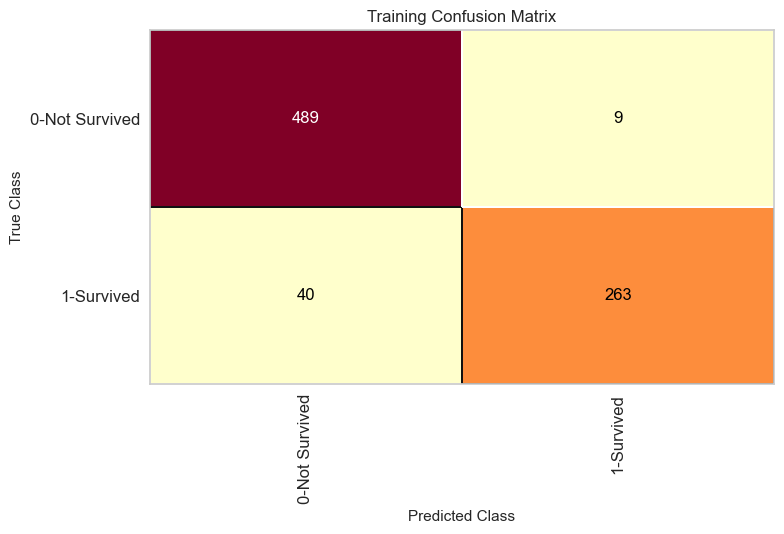

<Axes: title={'center': 'Training Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [38]:
classes = ['0-Not Survived','1-Survived']
cm = ConfusionMatrix(tpot,classes=classes,title='Training Confusion Matrix')
cm.score(X_train,y_train)
cm.show()

C:\Users\Himakar\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


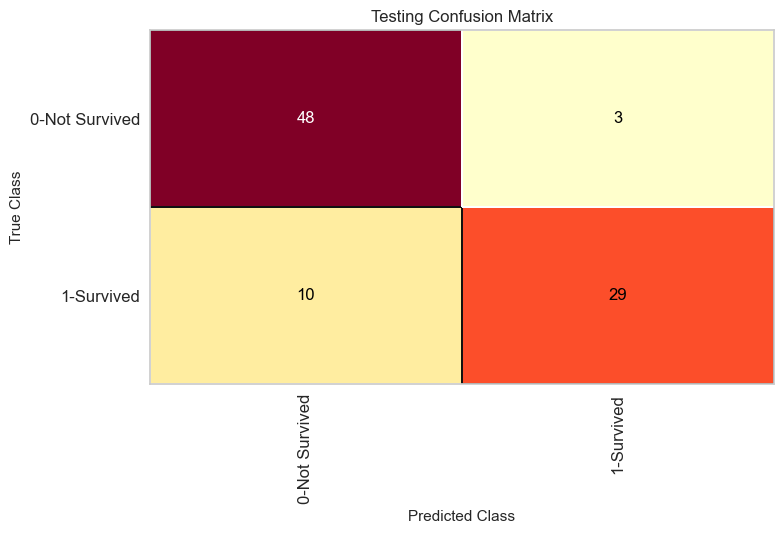

<Axes: title={'center': 'Testing Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [39]:
classes = ['0-Not Survived','1-Survived']
cm = ConfusionMatrix(tpot,classes=classes,title='Testing Confusion Matrix')
cm.score(X_test,y_test)
cm.show()

In [40]:
#This was the code goiven by automl tool TPOT
%pycat tpot_titanic_pipe.py

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=None)

# Average CV score on the training set was: 0.8364518633540372
exported_pipeline = make_pipeline(
    VarianceThreshold(threshold=0.0005),
    StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.1, max_depth=6, max_features=0.5, min_samples_leaf=1, min_samples_s